# Data Collection and Cleaning for Market Risk Analysis

In this notebook, we will:
- Download historical market data using yfinance.
- Clean the data by handling missing values.
- Compute daily returns.
- Perform basic exploratory data analysis.

[*********************100%***********************]  1 of 1 completed


Initial data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000

Missing values in each column:
Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64

Type of sp500:
<class 'pandas.core.frame.DataFrame'>

Columns after forward-fill:
MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
           

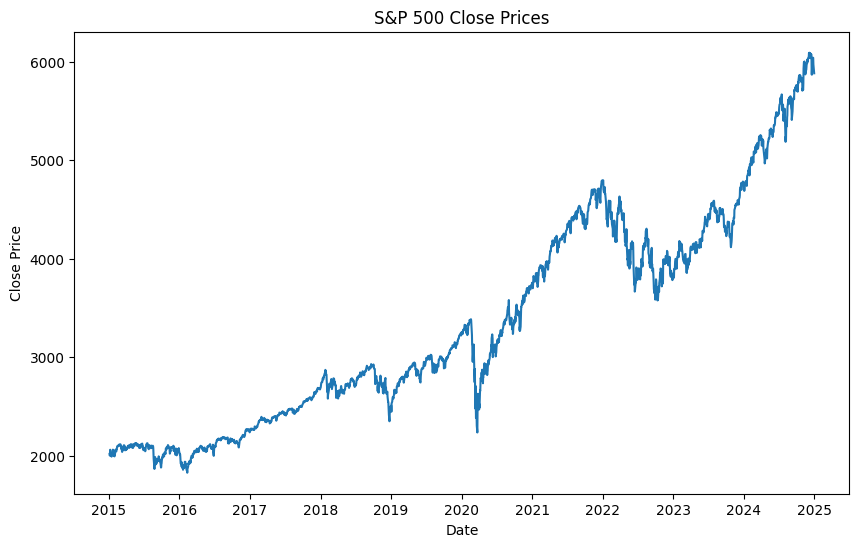

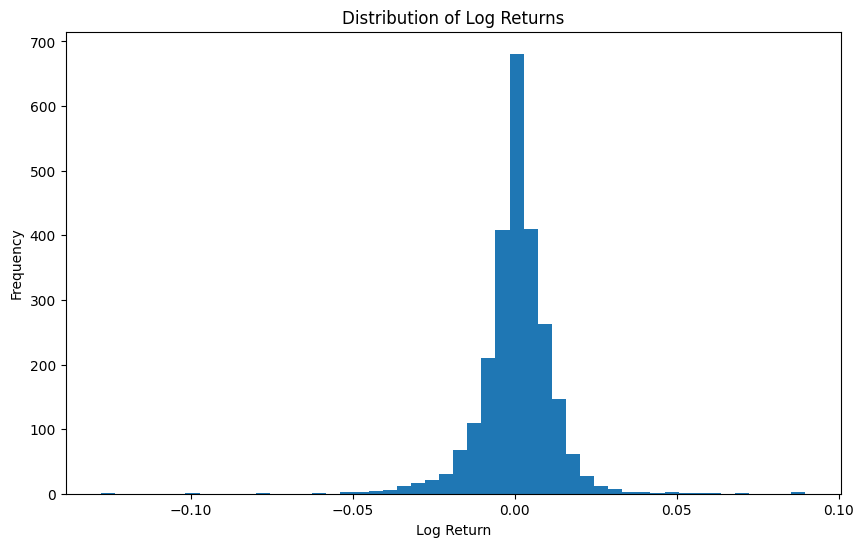

Cleaned data saved as sp500_data_cleaned.csv


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for data download
ticker = '^GSPC'
start_date = '2015-01-01'
end_date = '2025-01-01'

# Download the S&P 500 data; note that columns are stored as a MultiIndex
sp500 = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows to confirm the data was downloaded
print("Initial data:")
print(sp500.head())

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(sp500.isnull().sum())

print("\nType of sp500:")
print(type(sp500))

# Fill missing values using forward-fill
sp500 = sp500.ffill()

print("\nColumns after forward-fill:")
print(sp500.columns)

# Calculate Log Returns using the Close price
# Use .loc with tuple-based indexing to minimize SettingWithCopyWarning
sp500.loc[:, ('Log Returns', '^GSPC')] = np.log(
    sp500.loc[:, ('Close', '^GSPC')] / sp500.loc[:, ('Close', '^GSPC')].shift(1)
)

# Drop rows with NaN in the log returns column (typically the first row)
sp500 = sp500.dropna(subset=[('Log Returns', '^GSPC')])

# Display the first few rows of the Close and Log Returns columns
print("\nFirst five rows of Close and Log Returns:")
print(sp500[[('Close', '^GSPC'), ('Log Returns', '^GSPC')]].head())

# Basic summary statistics for Log Returns
print("\nSummary statistics for Log Returns:")
print(sp500[[('Log Returns', '^GSPC')]].describe())

# Plot the Close Price over time
plt.figure(figsize=(10, 6))
plt.plot(sp500.index, sp500[('Close', '^GSPC')])
plt.title("S&P 500 Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# Plot the Histogram of Log Returns
plt.figure(figsize=(10, 6))
plt.hist(sp500[('Log Returns', '^GSPC')], bins=50)
plt.title("Distribution of Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

# Save the cleaned dataset to a CSV file
sp500.to_csv("sp500_data_cleaned.csv", index=True)
print("Cleaned data saved as sp500_data_cleaned.csv")
